In [13]:
import torch, glob
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from torch.utils.data import Dataset
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments,\
                         TrOCRProcessor, VisionEncoderDecoderModel, default_data_collator

In [7]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("./checkpoints/checkpoint-1500")
model.to("cuda")

print("Model and Processor Ready !!!")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Model and Processor Ready !!!


In [20]:
def inference_ocr(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, return_tensors="pt", padding=True)
    inputs = inputs.to("cuda")
    outputs = model.generate(**inputs, max_length=128)
    return processor.tokenizer.decode(outputs[0], skip_special_tokens=True)

In [21]:
image_dir = 'ocr/image/'
all_images = glob.glob(image_dir + '*.*')
rand_idx = np.random.randint(0, len(all_images))
ran_image_path = all_images[rand_idx]

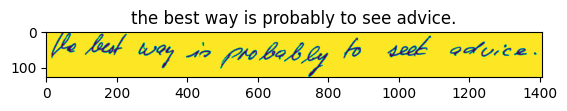

In [22]:
text = inference_ocr(ran_image_path)

img = Image.open(ran_image_path)
plt.imshow(img)
plt.title(text)
plt.show()